In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
data = './data/2016 Data Cleaned.xlsx'
data16 = pd.read_excel(data)
data16.head()

,State,County,GROC16,GROCPTH16,SUPERC16,SUPERCPTH16,CONVS16,CONVSPTH16,SPECS16,SPECSPTH16,...,PC_WIC_REDEMP16,REDEMP_WICS16,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,RECFACPTH16,Unnamed: 27,Unnamed: 28,Variable Code,Variable Name
0,AL,Autauga,3,0.054271,1,0.018090,31,0.560802,1,0.018090,...,14.620244,161530.296875,32.910876,3.309759,6,0.108542,NaN,NaN,GROC16,"Grocery stores, 2016"
1,AL,Baldwin,29,0.139753,7,0.033733,118,0.568650,27,0.130115,...,13.873837,102920.085938,32.910876,3.309759,21,0.101200,NaN,NaN,GROCPTH16,"Grocery stores/1,000 pop, 2016"
2,AL,Barbour,4,0.155195,1,0.038799,19,0.737177,2,0.077598,...,24.032284,103414.921875,32.910876,3.309759,0,0.000000,NaN,NaN,SUPERC16,"Supercenters & club stores, 2016"
3,AL,Bibb,5,0.220916,1,0.044183,15,0.662749,0,0.000000,...,22.081812,99703.796875,32.910876,3.309759,1,0.044183,NaN,NaN,SUPERCPTH16,"Supercenters & club stores/1,000 pop, 2016"
4,AL,Blount,5,0.086863,1,0.017373,27,0.469059,0,0.000000,...,13.860495,99651.757812,32.910876,3.309759,4,0.069490,NaN,NaN,CONVS16,"Convenience stores, 2016"


In [ ]:
# Load in training, holdout, and testing data sets

In [18]:
data_train_0 = pd.read_csv('./data/data_train_0.csv')
data_train_1 = pd.read_csv('./data/data_train_1.csv')
data_train_2 = pd.read_csv('./data/data_train_2.csv')
data_train_3 = pd.read_csv('./data/data_train_3.csv')
data_train_4 = pd.read_csv('./data/data_train_4.csv')

data_holdout_0 = pd.read_csv('./data/data_holdout_0.csv')
data_holdout_1 = pd.read_csv('./data/data_holdout_1.csv')
data_holdout_2 = pd.read_csv('./data/data_holdout_2.csv')
data_holdout_3 = pd.read_csv('./data/data_holdout_3.csv')
data_holdout_4 = pd.read_csv('./data/data_holdout_4.csv')

data_test = pd.read_csv('./data/data_test.csv')

In [ ]:
# combine all of thetraining data for some preliminarly exploratory data analysis

In [25]:
data_train = pd.concat([data_train_0, data_holdout_0], axis = 0)
data_train.columns

Index(['Unnamed: 0', 'State', 'County', 'FIPS', 'PERPOV10', 'METRO13',
       'SNAPSPTH17', 'REDEMP_SNAPS17', 'PCT_SNAP17', 'PC_SNAPBEN17',
       'PCT_NSLP17', 'PCT_SBP17', 'PCT_SFSP17', 'PCT_WIC17', 'PCT_CACFP17',
       'PCT_OBESE_ADULTS17', 'GROCPTH16', 'SUPERCPTH16', 'CONVSPTH16',
       'SPECSPTH16', 'WICSPTH16', 'FFRPTH16', 'FSRPTH16', 'PC_WIC_REDEMP16',
       'REDEMP_WICS16', 'PCT_WICINFANTCHILD16', 'PCT_WICWOMEN16',
       'RECFACPTH16', 'POVRATE15', 'MEDHHINC15', 'FDPIR15',
       'PCT_LACCESS_POP15', 'PCT_LACCESS_LOWI15', 'PCT_LACCESS_HHNV15',
       'FOODINSEC_15_17', 'VLFOODSEC_15_17', 'PopulationEstimate2017'],
      dtype='object')

In [30]:
ind_cols_17 = ['SNAPSPTH17', 'REDEMP_SNAPS17', 'PCT_SNAP17', 'PC_SPANBEN17', 'PCT_NSLP17', 'PCT_SBP17', 'PCT_SFSP17',
              'PCT_WIC17', 'PCT_CACFP17']
county_ind_17 = ['SNAPSPTH17', 'REDEMP_SNAPS17', 'PC_SNAPBEN17']
state_ind_17 = ['PCT_SNAP17', 'PCT_NSLP17', 'PCT_SBP17', 'PCT_SFSP17', 'PCT_WIC17', 'PCT_CACFP17']

ind_17_exp = ['SNAP-authorized stores/1,000 pop', 'SNAP redemptions/SNAP-authorized stores', 'SNAP participants (% pop)*',
             'SNAP benefits per capita', 'National School Lunch Program participants (% children)*',
              'School Breakfast Program participants (% children)*', 'Summer Food Service Program participants (% children)*',
             'WIC participants (% pop)*', 'Child & Adult Care (% pop)*']
county_ind_17_exp = ['SNAP-authorized stores/1,000 pop', 'SNAP redemptions/SNAP-authorized stores','SNAP benefits per capita']
state_ind_17_exp = ['SNAP participants (% pop)', 'National School Lunch Program participants (% children)',
                    'School Breakfast Program participants (% children)', 'Summer Food Service Program participants (% children)',
                   'WIC participants (% pop)', 'Child & Adult Care (% pop)']

In [61]:
states = data_train['State'].drop_duplicates()

In [84]:
perpov_counties = []
for state in states:
    rows = data_train[data_train["State"] == state]
    count = sum(rows["PERPOV10"])
    perpov_counties.append(count)
perpov_counties = pd.DataFrame(perpov_counties)
perpov_counties.columns = ["PERPOV10_COUNT"]

y1 = data_train["FOODINSEC_15_17"].drop_duplicates()
y2 = data_train["VLFOODSEC_15_17"].drop_duplicates()
state_cols = data_train[state_ind_17].drop_duplicates()
state_labs = data_train["State"].drop_duplicates()
state_data = pd.concat([state_labs, state_cols, perpov_counties, y1, y2], axis = 1)
state_data.head()

,State,PCT_SNAP17,PCT_NSLP17,PCT_SBP17,PCT_SFSP17,PCT_WIC17,PCT_CACFP17,PERPOV10_COUNT,FOODINSEC_15_17,VLFOODSEC_15_17
0,PA,0.472966,-0.841651,-1.026770,-0.350957,-0.924933,-0.490471,1.0,-0.334963,-1.041504
1,AK,-0.267251,-2.077589,-0.984943,-0.506314,0.775693,-0.201093,2.0,-0.562924,-1.325938
2,MA,-0.544072,-0.812231,-1.015979,0.354531,-1.223013,-0.569388,0.0,0.713660,1.233963
3,MS,1.613792,1.139038,1.223594,1.018688,1.638242,0.613434,46.0,-0.015817,-0.283015
4,AL,1.138116,0.442467,0.655178,0.652025,0.984289,-0.453889,17.0,1.579914,1.897641


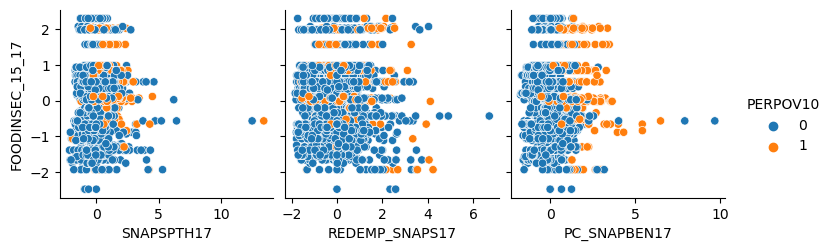

In [85]:
sns.pairplot(
                data=data_train,
                x_vars=county_ind_17,
                y_vars='FOODINSEC_15_17',
                hue='PERPOV10'
            )

plt.show()

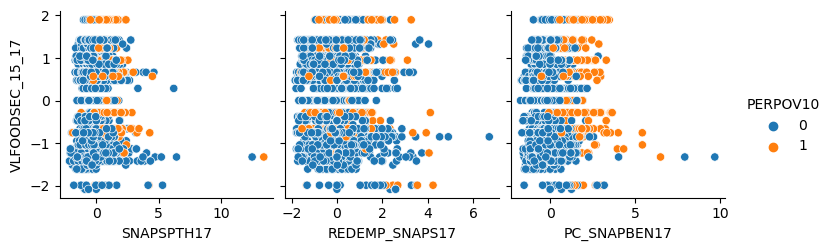

In [33]:
sns.pairplot(
                data=data_train,
                x_vars=county_ind_17,
                y_vars='VLFOODSEC_15_17',
                hue='PERPOV10'
            )

plt.show()

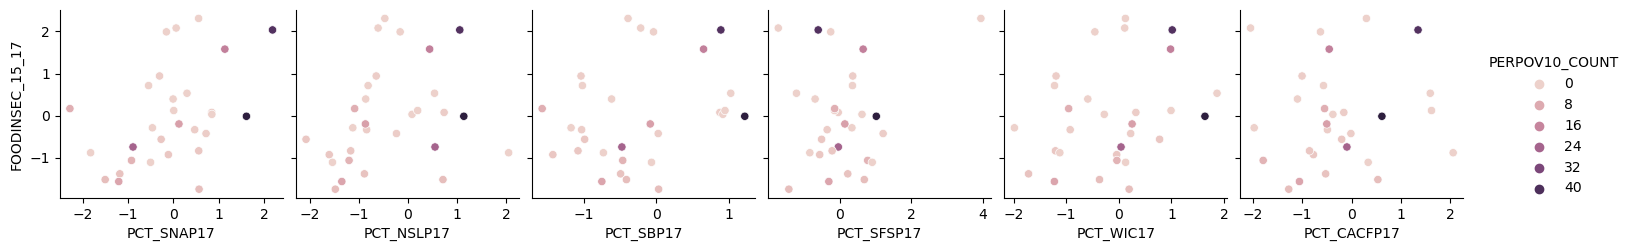

In [86]:
sns.pairplot(
                data=state_data,
                x_vars=state_ind_17,
                y_vars='FOODINSEC_15_17',
                hue="PERPOV10_COUNT"
            )

plt.show()

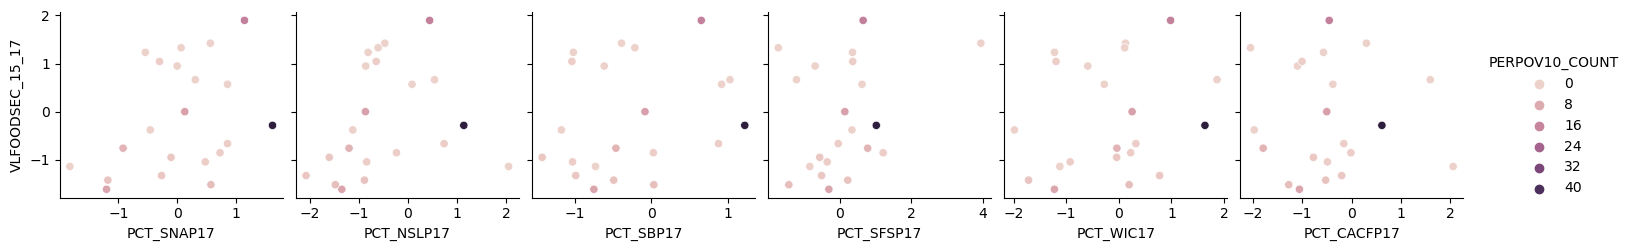

In [88]:
sns.pairplot(
                data=state_data,
                x_vars=state_ind_17,
                y_vars='VLFOODSEC_15_17',
                hue="PERPOV10_COUNT"
            )

plt.show()

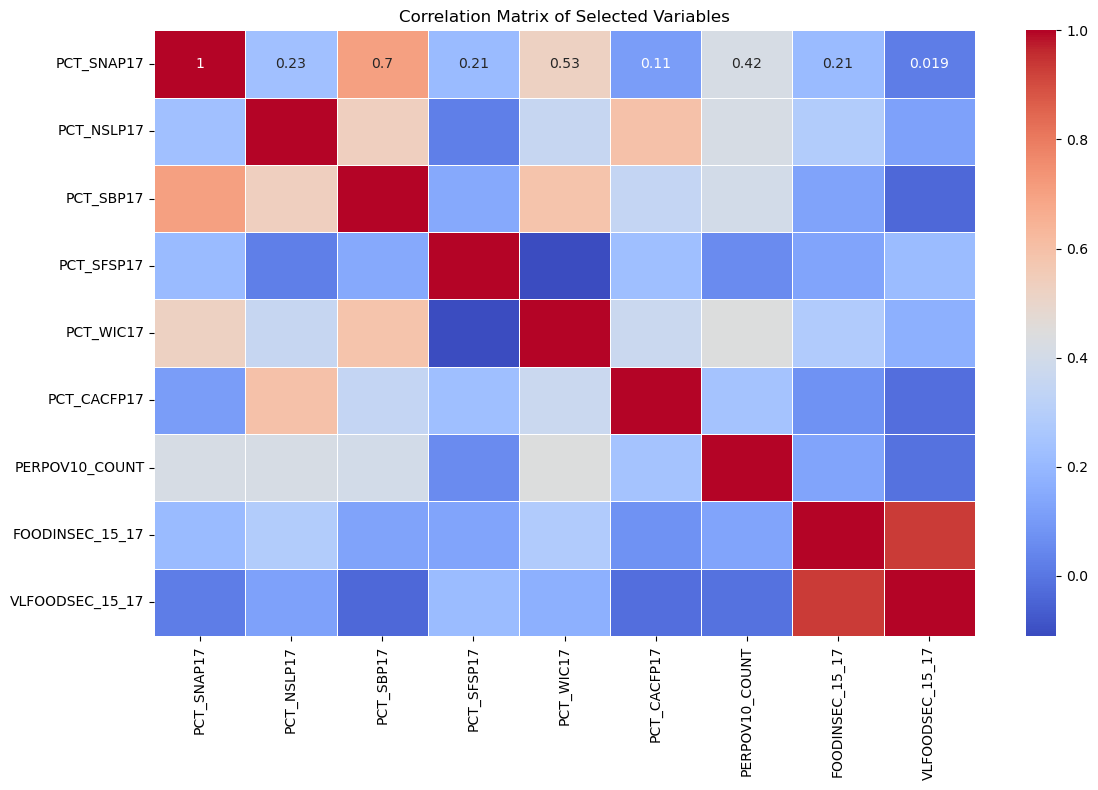

In [91]:
df_selected = state_data.drop('State', axis = 1)

# Create a correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Selected Variables')
plt.tight_layout()
plt.show()

['SNAP-authorized stores/1,000 pop', 'SNAP redemptions/SNAP-authorized stores', 'SNAP benefits per capita']


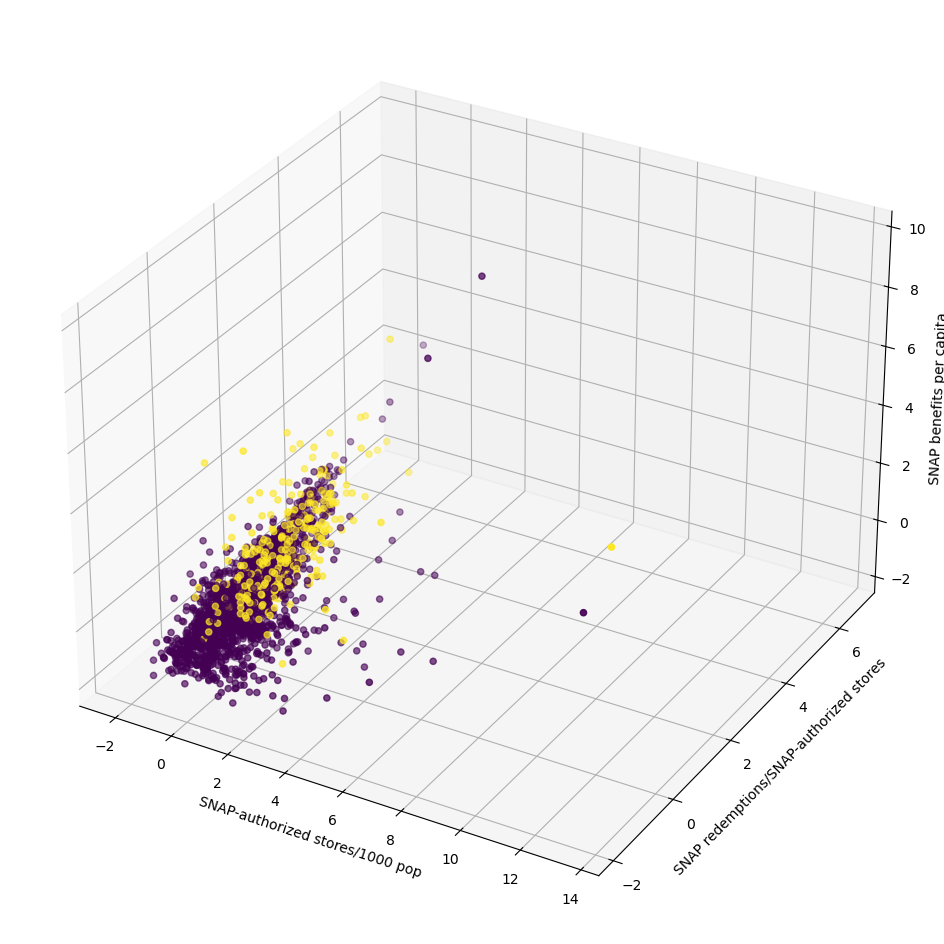

In [97]:
# Create a 3D plot coloring by persistent poverty counties to see if we can do SVM or something
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

x_vals = data_train['SNAPSPTH17']
y_vals = data_train['REDEMP_SNAPS17']
z_vals = data_train['PC_SNAPBEN17']
print(county_ind_17_exp)

ax.scatter(x_vals, y_vals, z_vals,
          c = data_train["PERPOV10"])
ax.set_xlabel('SNAP-authorized stores/1000 pop')
ax.set_ylabel('SNAP redemptions/SNAP-authorized stores')
ax.set_zlabel('SNAP benefits per capita')
plt.show()

In [110]:
# These might be separable... Let's see how well a SVM does
from sklearn.svm import LinearSVC

In [111]:
county_ind_17

['SNAPSPTH17', 'REDEMP_SNAPS17', 'PC_SNAPBEN17']

In [112]:
Cs = [10, 1, 0.1, 0.01, 0.001]

training_sets = [data_train_0, data_train_1, data_train_2, data_train_3, data_train_4]

holdout_sets = [data_holdout_0, data_holdout_1, data_holdout_2, data_holdout_3, data_holdout_4]

In [127]:
for i in range(len(Cs)):
    C = Cs[i]
    svc = LinearSVC(C=Cs[i], max_iter=100000, dual = True)
    svc.fit(training_sets[i][county_ind_17], training_sets[i]["PERPOV10"])
    Z = svc.decision_function(training_sets[i][county_ind_17]).reshape(training_sets[i][county_ind_17[0]].shape)
    accuracy = svc.score(holdout_sets[i][county_ind_17], holdout_sets[i]["PERPOV10"])
    print("A C value of {} produced an accuracy score of {}".format(C, accuracy))

A C value of 10 produced an accuracy score of 0.9065606361829026
A C value of 1 produced an accuracy score of 0.9244532803180915
A C value of 0.1 produced an accuracy score of 0.9103585657370518
A C value of 0.01 produced an accuracy score of 0.9103585657370518
A C value of 0.001 produced an accuracy score of 0.9043824701195219
